In [53]:
import csv

import numpy
import scipy

import matplotlib.pyplot as plt
## Matplotlib style
%matplotlib inline
plt.style.use('ggplot')

from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn import neighbors
import knnplots

In [2]:
fileName = "wdbc.csv"
fileOpen = open(fileName, "rU")
csvData = csv.reader(fileOpen)
dataList = list(csvData)
dataArray =  numpy.array(dataList)
X = dataArray[:,2:32].astype(float)
y = dataArray[:, 1]
le = preprocessing.LabelEncoder()
le.fit(y)
y_transformed = le.transform(y)

In [19]:
nbrs = neighbors.NearestNeighbors(n_neighbors=5, algorithm="ball_tree").fit(X)
distances, indices = nbrs.kneighbors(X)

In [20]:
print distances[:5]

[[   0.          186.61763     194.56881285  204.17130519  209.53712484]
 [   0.           16.06923809   66.63172654   86.23022834   89.33922096]
 [   0.           51.71676151   54.63359021   59.60206533   63.9928558 ]
 [   0.           38.7219779    41.30213961   41.55850963   43.94512385]
 [   0.           71.35224151   78.89119808   84.465998     87.91102634]]


In [21]:
print indices[:5]

[[  0 337 254  56  70]
 [  1 373 323 233 449]
 [  2 366 487 302 565]
 [  3 531 488 530 160]
 [  4 533  78 210 321]]


In [23]:
knnk3 = neighbors.KNeighborsClassifier(n_neighbors=3).fit(X, y_transformed)
predicted_k3 = knnk3.predict(X)

In [24]:
knnk5 = neighbors.KNeighborsClassifier(n_neighbors=5).fit(X, y_transformed)
predicted_k5 = knnk5.predict(X)

In [25]:
knnk15 = neighbors.KNeighborsClassifier(n_neighbors=15).fit(X, y_transformed)
predicted_k15 = knnk15.predict(X)

In [26]:
print predicted_k3

[1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 1 1 

In [29]:
non_agreement = predicted_k3[predicted_k3 != predicted_k15]
len(non_agreement)

19

In [30]:
non_agreement_pk3 = predicted_k3[predicted_k3 != y_transformed]
print len(non_agreement_pk3)

non_agreement_pk15 = predicted_k15[predicted_k15 != y_transformed]
print len(non_agreement_pk15)

25
34


In [31]:
print metrics.accuracy_score(y_transformed, predicted_k3)
print metrics.accuracy_score(y_transformed, predicted_k15)

0.956063268893
0.940246045694


In [32]:
knnWD = neighbors.KNeighborsClassifier(n_neighbors=3, weights='distance').fit(X, y_transformed)
predictedWD = knnWD.predict(X)

In [33]:
## Randomly split the data between training and testing:
X_train, X_test, Y_train, Y_test = train_test_split(X, y_transformed)

In [34]:
print X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

(426, 30) (143, 30) (426,) (143,)


In [44]:
# Figure 4.4
accuracy = (92 + 41.) / (93 + 50)
precision = 92. / (92 + 9)
sensitivity = 92. / (92 + 1)
specificity = 41. / (9 + 41)
print accuracy, precision, sensitivity, specificity

0.93006993007 0.910891089109 0.989247311828 0.82


In [46]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3).fit(X_train, Y_train)
predicted = knn.predict(X_test)

In [48]:
confusion_matrix = metrics.confusion_matrix(Y_test, predicted)

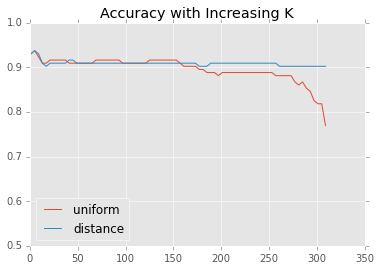

In [54]:
knnplots.plotaccuracy(X_train, Y_train, X_test, Y_test, 310)

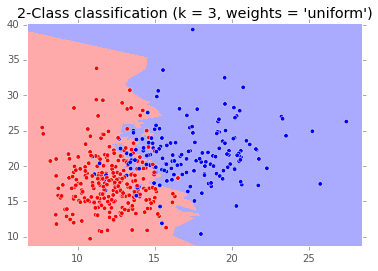

In [55]:
knnplots.decisionplot(X_train, Y_train, n_neighbors=3, weights="uniform")

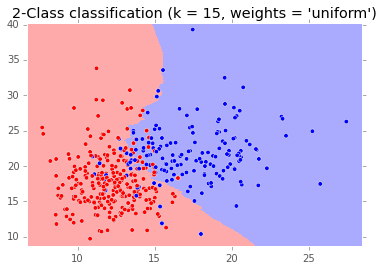

In [56]:
knnplots.decisionplot(X_train, Y_train, n_neighbors=15, weights="uniform")